## <font size=5> <strong>News Quality Prediction - Images - Annotated Dataset
 

## I. Importing essential libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
np.random.seed(42)


## II. Importing and understanding our dataset 

In [84]:
dataset = pd.read_csv('../data/images.csv')

dataset.head(1)

,image_id,Child,Smile,Emotions,Female,Male,PeopleNumber,Text,Portrait,Indoors,Outdoors,Animal,Building,Graphics,Vehicle,Fire,Nature,Sports,Food,Crime,dominantColor,date,number,result,title,body,author,url,Noimages,Publication,URL,Message,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),celeb_num,has_celebrity,celeb_name,Contrast,Unnamed: 0,filename,width,height
0,4498019640257749.jfif,True,True,"['CALM', 'HAPPY', 'DISGUSTED']",True,True,8.0,False,False,False,False,False,False,False,False,False,False,False,False,False,grey,2019-05-10 22:07:30+00:00,news_1,1,Britney Spears leaves closed-door court hearin...,Britney Spears left court in Los Angeles baref...,Lauren Fruen,https://www.dailymail.co.uk/news/article-70167...,11,DailyMail,https://www.facebook.com/164305410295882/posts...,Britney is making bad decisions and it's a pro...,117,57,30,13,1,2,2,12,0,0,-7.31,3,True,"['Lynne Spears', 'Britney Spears']",HIGH,1366,4498019640257749.jfif,500,261


In [85]:
dataset.shape

(1451, 51)

In [86]:
dataset['Shares'].describe([.80, .90, .91, .95])

count     1451.000000
mean       407.731220
std       1312.313711
min          0.000000
50%         70.000000
80%        339.000000
90%        820.000000
91%        969.000000
95%       1854.500000
max      27161.000000
Name: Shares, dtype: float64

In [87]:
dataset['Shares'].describe([.20, .15, .10, .05])

count     1451.000000
mean       407.731220
std       1312.313711
min          0.000000
5%           4.000000
10%          9.000000
15%         14.000000
20%         19.000000
50%         70.000000
max      27161.000000
Name: Shares, dtype: float64

In [96]:
dataset[dataset['Shares'] >339].shape

(290, 52)

In [97]:
dataset['Shares'] = dataset['Shares'].dropna()

In [98]:
data_good = dataset[dataset['Shares'] >339]
data_good.shape

(290, 52)

In [99]:
data_good['engagement'] = 1

In [100]:
data_bad = dataset[dataset['Shares'] <19] 
data_bad.shape

(285, 52)

In [101]:
data_bad['engagement'] = 0

In [102]:
pdList = [data_bad, data_good]  # List of your dataframes
dataset= pd.concat(pdList)

In [103]:
dataset.columns

Index(['image_id', 'Child', 'Smile', 'Emotions', 'Female', 'Male',
       'PeopleNumber', 'Text', 'Portrait', 'Indoors', 'Outdoors', 'Animal',
       'Building', 'Graphics', 'Vehicle', 'Fire', 'Nature', 'Sports', 'Food',
       'Crime', 'dominantColor', 'date', 'number', 'result', 'title', 'body',
       'author', 'url', 'Noimages', 'Publication', 'URL', 'Message',
       'Total Interactions', 'Likes', 'Comments', 'Shares', 'Love', 'Wow',
       'Haha', 'Sad', 'Angry', 'Care',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'celeb_num', 'has_celebrity', 'celeb_name', 'Contrast', 'Unnamed: 0',
       'filename', 'width', 'height', 'engagement'],
      dtype='object')

In [104]:
dataset.drop(['title', 'body','Publication', 'URL', 'Message',
              'celeb_name','date', 'number', 'result',
       'author', 'url','Unnamed: 0', 'filename' , 'width'],axis=1, inplace=True)

In [105]:
dataset.drop(['Total Interactions', 'Likes', 'Comments', 'Shares', 'Love', 'Wow',
       'Haha', 'Sad', 'Angry', 'Care', 
             'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )'
             ],axis=1, inplace=True)

#### Shape of dataset

In [106]:
dataset.shape

(575, 27)

#### Printing out a few columns

In [107]:
dataset.head(5)

,image_id,Child,Smile,Emotions,Female,Male,PeopleNumber,Text,Portrait,Indoors,Outdoors,Animal,Building,Graphics,Vehicle,Fire,Nature,Sports,Food,Crime,dominantColor,Noimages,celeb_num,has_celebrity,Contrast,height,engagement
0,4498019640257749.jfif,True,True,"['CALM', 'HAPPY', 'DISGUSTED']",True,True,8.0,False,False,False,False,False,False,False,False,False,False,False,False,False,grey,11,3,True,HIGH,261,0
17,2603887042961476.jfif,True,False,[],True,False,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,brown,6,0,False,HIGH,261,0
24,4727114364014941.jfif,False,True,[],False,True,1.0,False,False,False,False,False,False,False,False,False,False,True,False,False,No color found,3,2,True,HIGH,261,0
27,4790148151044895.jfif,False,False,['CALM'],False,True,2.0,False,False,False,False,False,False,False,False,False,False,False,True,False,No color found,9,0,False,HIGH,261,0
29,4957899894269719.jfif,False,False,['CALM'],True,True,3.0,False,True,False,False,False,False,False,False,False,False,False,False,False,No color found,3,0,False,HIGH,261,0


In [108]:
dataset['CALM'] = dataset['Emotions'].apply(lambda x: 1  if 'CALM' in x else 0)

In [109]:
dataset['HAPPY'] = dataset['Emotions'].apply(lambda x: 1  if 'HAPPY' in x else 0)

In [110]:
dataset['DISGUSTED'] = dataset['Emotions'].apply(lambda x: 1  if 'DISGUSTED' in x else 0)

In [111]:
dataset['FEAR'] = dataset['Emotions'].apply(lambda x: 1  if 'FEAR' in x else 0)

In [112]:
dataset['SAD'] = dataset['Emotions'].apply(lambda x: 1  if 'SAD' in x else 0)

In [113]:
dataset['SURPRISED'] = dataset['Emotions'].apply(lambda x: 1  if 'SURPRISED' in x else 0)

In [114]:
dataset['CONFUSED'] = dataset['Emotions'].apply(lambda x: 1  if 'CONFUSED' in x else 0)

In [115]:
dataset['ANGRY'] = dataset['Emotions'].apply(lambda x: 1  if 'ANGRY' in x else 0)

In [116]:
dataset.tail(5)

,image_id,Child,Smile,Emotions,Female,Male,PeopleNumber,Text,Portrait,Indoors,Outdoors,Animal,Building,Graphics,Vehicle,Fire,Nature,Sports,Food,Crime,dominantColor,Noimages,celeb_num,has_celebrity,Contrast,height,engagement,CALM,HAPPY,DISGUSTED,FEAR,SAD,SURPRISED,CONFUSED,ANGRY
1430,10157624180256636.jfif,False,False,"['CALM', 'SAD']",True,True,7.0,False,False,True,False,False,False,False,False,False,False,False,False,False,No color found,51,0,False,HIGH,261,1,1,0,0,0,1,0,0,0
1438,4511147248944988.jfif,True,True,"['CALM', 'HAPPY']",True,True,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,grey,9,0,False,HIGH,261,1,1,1,0,0,0,0,0,0
1446,10160469430311509.jfif,False,False,['CALM'],True,False,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,No color found,1,0,False,HIGH,261,1,1,0,0,0,0,0,0,0
1449,10152130406544999.jfif,False,False,"['CALM', 'SAD', 'ANGRY']",True,True,11.0,False,False,False,False,False,False,False,False,False,False,False,False,False,grey,5,0,False,HIGH,261,1,1,0,0,0,1,0,0,1
1450,10158200085756323.jfif,False,False,['ANGRY'],False,True,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,No color found,6,2,True,HIGH,261,1,0,0,0,0,0,0,0,1


In [117]:
#drop duplicates
#dataset.drop_duplicates(subset=['image_id'], keep='first', inplace = True)
#dataset.reset_index(drop=True, inplace = True)

In [118]:
dataset.shape

(575, 35)

In [119]:
#dataset.Emotions.unique()

In [120]:
dataset.dominantColor.unique()

array(['grey', 'brown', 'No color found', 'red', 'purple', 'blue',
       'green', 'pink', 'yellow', 'white'], dtype=object)

In [121]:
mapping = {'No color found': 0, 'grey': 1, 'brown': 2, 'red': 3, 'blue': 4, 'purple': 5,
           'white': 6, 'green': 7, 'pink': 8, 'yellow': 9}

dataset.replace({'dominantColor': mapping})

,image_id,Child,Smile,Emotions,Female,Male,PeopleNumber,Text,Portrait,Indoors,Outdoors,Animal,Building,Graphics,Vehicle,Fire,Nature,Sports,Food,Crime,dominantColor,Noimages,celeb_num,has_celebrity,Contrast,height,engagement,CALM,HAPPY,DISGUSTED,FEAR,SAD,SURPRISED,CONFUSED,ANGRY
0,4498019640257749.jfif,True,True,"['CALM', 'HAPPY', 'DISGUSTED']",True,True,8.0,False,False,False,False,False,False,False,False,False,False,False,False,False,1,11,3,True,HIGH,261,0,1,1,1,0,0,0,0,0
17,2603887042961476.jfif,True,False,[],True,False,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,2,6,0,False,HIGH,261,0,0,0,0,0,0,0,0,0
24,4727114364014941.jfif,False,True,[],False,True,1.0,False,False,False,False,False,False,False,False,False,False,True,False,False,0,3,2,True,HIGH,261,0,0,0,0,0,0,0,0,0
27,4790148151044895.jfif,False,False,['CALM'],False,True,2.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,9,0,False,HIGH,261,0,1,0,0,0,0,0,0,0
29,4957899894269719.jfif,False,False,['CALM'],True,True,3.0,False,True,False,False,False,False,False,False,False,False,False,False,False,0,3,0,False,HIGH,261,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,10157624180256636.jfif,False,False,"['CALM', 'SAD']",True,True,7.0,False,False,True,False,False,False,False,False,False,False,False,False,False,0,51,0,False,HIGH,261,1,1,0,0,0,1,0,0,0
1438,4511147248944988.jfif,True,True,"['CALM', 'HAPPY']",True,True,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,1,9,0,False,HIGH,261,1,1,1,0,0,0,0,0,0
1446,10160469430311509.jfif,False,False,['CALM'],True,False,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,0,1,0,False,HIGH,261,1,1,0,0,0,0,0,0,0
1449,10152130406544999.jfif,False,False,"['CALM', 'SAD', 'ANGRY']",True,True,11.0,False,False,False,False,False,False,False,False,False,False,False,False,False,1,5,0,False,HIGH,261,1,1,0,0,0,1,0,0,1


In [122]:
dataset.replace({'dominantColor': mapping}, inplace= True)

In [123]:
dataset.drop(['Emotions', 'image_id', 'Contrast' ],axis=1, inplace=True)

In [124]:
dataset["Child"] = dataset["Child"].astype(int)

In [125]:
dataset["Smile"] = dataset["Smile"].astype(int)

In [126]:
dataset["Female"] = dataset["Female"].astype(int)

In [127]:
dataset["Male"] = dataset["Male"].astype(int)

In [128]:
dataset["Text"] = dataset["Text"].astype(int)

In [129]:
dataset["Portrait"] = dataset["Portrait"].astype(int)

In [130]:
dataset["Indoors"] = dataset["Indoors"].astype(int)

In [131]:
dataset["Outdoors"] = dataset["Outdoors"].astype(int)

In [132]:
dataset["Animal"] = dataset["Animal"].astype(int)

In [133]:
dataset["Building"] = dataset["Building"].astype(int)

In [134]:
dataset["Graphics"] = dataset["Graphics"].astype(int)

In [135]:
dataset["Building"] = dataset["Building"].astype(int)

In [136]:
dataset["Vehicle"] = dataset["Vehicle"].astype(int)

In [137]:
dataset["Fire"] = dataset["Fire"].astype(int)

In [138]:
dataset["Nature"] = dataset["Nature"].astype(int)

In [139]:
dataset["Sports"] = dataset["Sports"].astype(int)

In [140]:
dataset["Food"] = dataset["Food"].astype(int)

In [141]:
dataset["Crime"] = dataset["Crime"].astype(int)

In [142]:
dataset["has_celebrity"] = dataset["has_celebrity"].astype(int)

Indoors	Outdoors

In [143]:
dataset['Indoors'] =dataset['Indoors'].replace(1,'Indoors')

In [144]:
dataset['Outdoors'] =dataset['Outdoors'].replace(1,'Outdoors')

In [145]:
dataset.dtypes

Child              int64
Smile              int64
Female             int64
Male               int64
PeopleNumber     float64
Text               int64
Portrait           int64
Indoors           object
Outdoors          object
Animal             int64
Building           int64
Graphics           int64
Vehicle            int64
Fire               int64
Nature             int64
Sports             int64
Food               int64
Crime              int64
dominantColor      int64
Noimages           int64
celeb_num          int64
has_celebrity      int64
height             int64
engagement         int64
CALM               int64
HAPPY              int64
DISGUSTED          int64
FEAR               int64
SAD                int64
SURPRISED          int64
CONFUSED           int64
ANGRY              int64
dtype: object

In [146]:
 dataset["Indoors"] =  dataset["Indoors"].astype('str') 

In [147]:
 dataset["Outdoors"] =  dataset["Outdoors"].astype('str') 

In [148]:
dataset["Indoors/Outdoors"] = dataset["Outdoors"].astype(str) + dataset["Indoors"].astype('str') 

In [149]:
dataset["Indoors/Outdoors"].unique()

array(['00', '0Indoors', 'Outdoors0', 'OutdoorsIndoors'], dtype=object)

In [150]:
mapping2 = {'00': 0, '0Indoors': 1, 'Outdoors0': 2, 'OutdoorsIndoors': 3}

dataset.replace({'Indoors/Outdoors': mapping2}, inplace= True)

In [151]:
dataset.drop(["Indoors","Outdoors"],axis=1, inplace=True)

#### Description

In [152]:
dataset.describe()

,Child,Smile,Female,Male,PeopleNumber,Text,Portrait,Animal,Building,Graphics,Vehicle,Fire,Nature,Sports,Food,Crime,dominantColor,Noimages,celeb_num,has_celebrity,height,engagement,CALM,HAPPY,DISGUSTED,FEAR,SAD,SURPRISED,CONFUSED,ANGRY,Indoors/Outdoors
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.00000,575.000000,575.000000,575.000000
mean,0.090435,0.226087,0.427826,0.600000,2.638261,0.213913,0.236522,0.052174,0.130435,0.001739,0.099130,0.024348,0.100870,0.022609,0.034783,0.055652,1.290435,8.862609,0.831304,0.339130,263.201739,0.504348,0.400000,0.212174,0.012174,0.078261,0.194783,0.04000,0.041739,0.052174,0.260870
std,0.287053,0.418660,0.495194,0.490325,4.857330,0.410423,0.425316,0.222571,0.337074,0.041703,0.299097,0.154261,0.301418,0.148782,0.183388,0.229448,1.581964,13.874634,1.276043,0.473826,37.299770,0.500416,0.490325,0.409203,0.109757,0.268816,0.396378,0.19613,0.200167,0.222571,0.636943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,261.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,261.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,1.000000,261.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,115.000000,9.000000,1.000000,894.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000


In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 1450
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Child             575 non-null    int64  
 1   Smile             575 non-null    int64  
 2   Female            575 non-null    int64  
 3   Male              575 non-null    int64  
 4   PeopleNumber      575 non-null    float64
 5   Text              575 non-null    int64  
 6   Portrait          575 non-null    int64  
 7   Animal            575 non-null    int64  
 8   Building          575 non-null    int64  
 9   Graphics          575 non-null    int64  
 10  Vehicle           575 non-null    int64  
 11  Fire              575 non-null    int64  
 12  Nature            575 non-null    int64  
 13  Sports            575 non-null    int64  
 14  Food              575 non-null    int64  
 15  Crime             575 non-null    int64  
 16  dominantColor     575 non-null    int64  
 

In [154]:
dataset.engagement

0       0
17      0
24      0
27      0
29      0
       ..
1430    1
1438    1
1446    1
1449    1
1450    1
Name: engagement, Length: 575, dtype: int64

### Checking correlation between columns

In [155]:
print(dataset.corr()["engagement"].abs().sort_values(ascending=False))

engagement          1.000000
Vehicle             0.136742
Female              0.134067
Smile               0.104488
HAPPY               0.098099
Text                0.084530
Indoors/Outdoors    0.078423
SURPRISED           0.078103
Animal              0.060527
height              0.059596
Portrait            0.053953
Building            0.053438
FEAR                0.047862
CALM                0.042601
Graphics            0.042104
dominantColor       0.041316
Sports              0.033777
CONFUSED            0.032970
Nature              0.031738
Child               0.026998
Fire                0.023942
Food                0.017333
Crime               0.017284
DISGUSTED           0.016825
Male                0.014200
celeb_num           0.008398
Noimages            0.005309
has_celebrity       0.004792
SAD                 0.004506
ANGRY               0.002040
PeopleNumber        0.000648
Name: engagement, dtype: float64


In [156]:
#This shows that most columns are moderately correlated with target.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    290
0    285
Name: engagement, dtype: int64


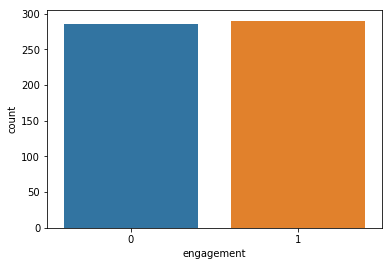

In [157]:
y = dataset["engagement"]

sns.countplot(y)


target_temp = dataset.engagement.value_counts()

print(target_temp)

## IV. Train Test split

In [158]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("engagement",axis=1)
target = dataset["engagement"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## V. Model Fitting

In [159]:
from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [161]:
Y_pred_lr.shape

(115,)

In [162]:
print('Classification Report\n', classification_report(Y_test, Y_pred_lr))

Classification Report
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        51
           1       0.62      0.62      0.62        64

    accuracy                           0.58       115
   macro avg       0.58      0.58      0.58       115
weighted avg       0.58      0.58      0.58       115



### Naive Bayes

In [163]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [164]:
Y_pred_nb.shape

(115,)

In [165]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 54.78 %


In [166]:
print('Classification Report\n', classification_report(Y_test, Y_pred_nb))

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.55      0.98      0.71        64

    accuracy                           0.55       115
   macro avg       0.28      0.49      0.35       115
weighted avg       0.31      0.55      0.39       115



### SVM

In [167]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [168]:
Y_pred_svm.shape

(115,)

In [169]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 60.87 %


In [170]:
print('Classification Report\n', classification_report(Y_test, Y_pred_svm))

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.53      0.55        51
           1       0.64      0.67      0.66        64

    accuracy                           0.61       115
   macro avg       0.60      0.60      0.60       115
weighted avg       0.61      0.61      0.61       115



### K Nearest Neighbors

In [171]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [172]:
Y_pred_knn.shape

(115,)

In [173]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 61.74 %


In [174]:
print('Classification Report\n', classification_report(Y_test, Y_pred_knn))

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.63      0.59        51
           1       0.67      0.61      0.64        64

    accuracy                           0.62       115
   macro avg       0.62      0.62      0.62       115
weighted avg       0.62      0.62      0.62       115



### Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x, max_depth = 8)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [176]:
print(Y_pred_dt.shape)

(115,)


In [177]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 63.48 %


In [178]:
print('Classification Report\n', classification_report(Y_test, Y_pred_dt))

Classification Report
               precision    recall  f1-score   support

           0       0.60      0.55      0.57        51
           1       0.66      0.70      0.68        64

    accuracy                           0.63       115
   macro avg       0.63      0.63      0.63       115
weighted avg       0.63      0.63      0.63       115



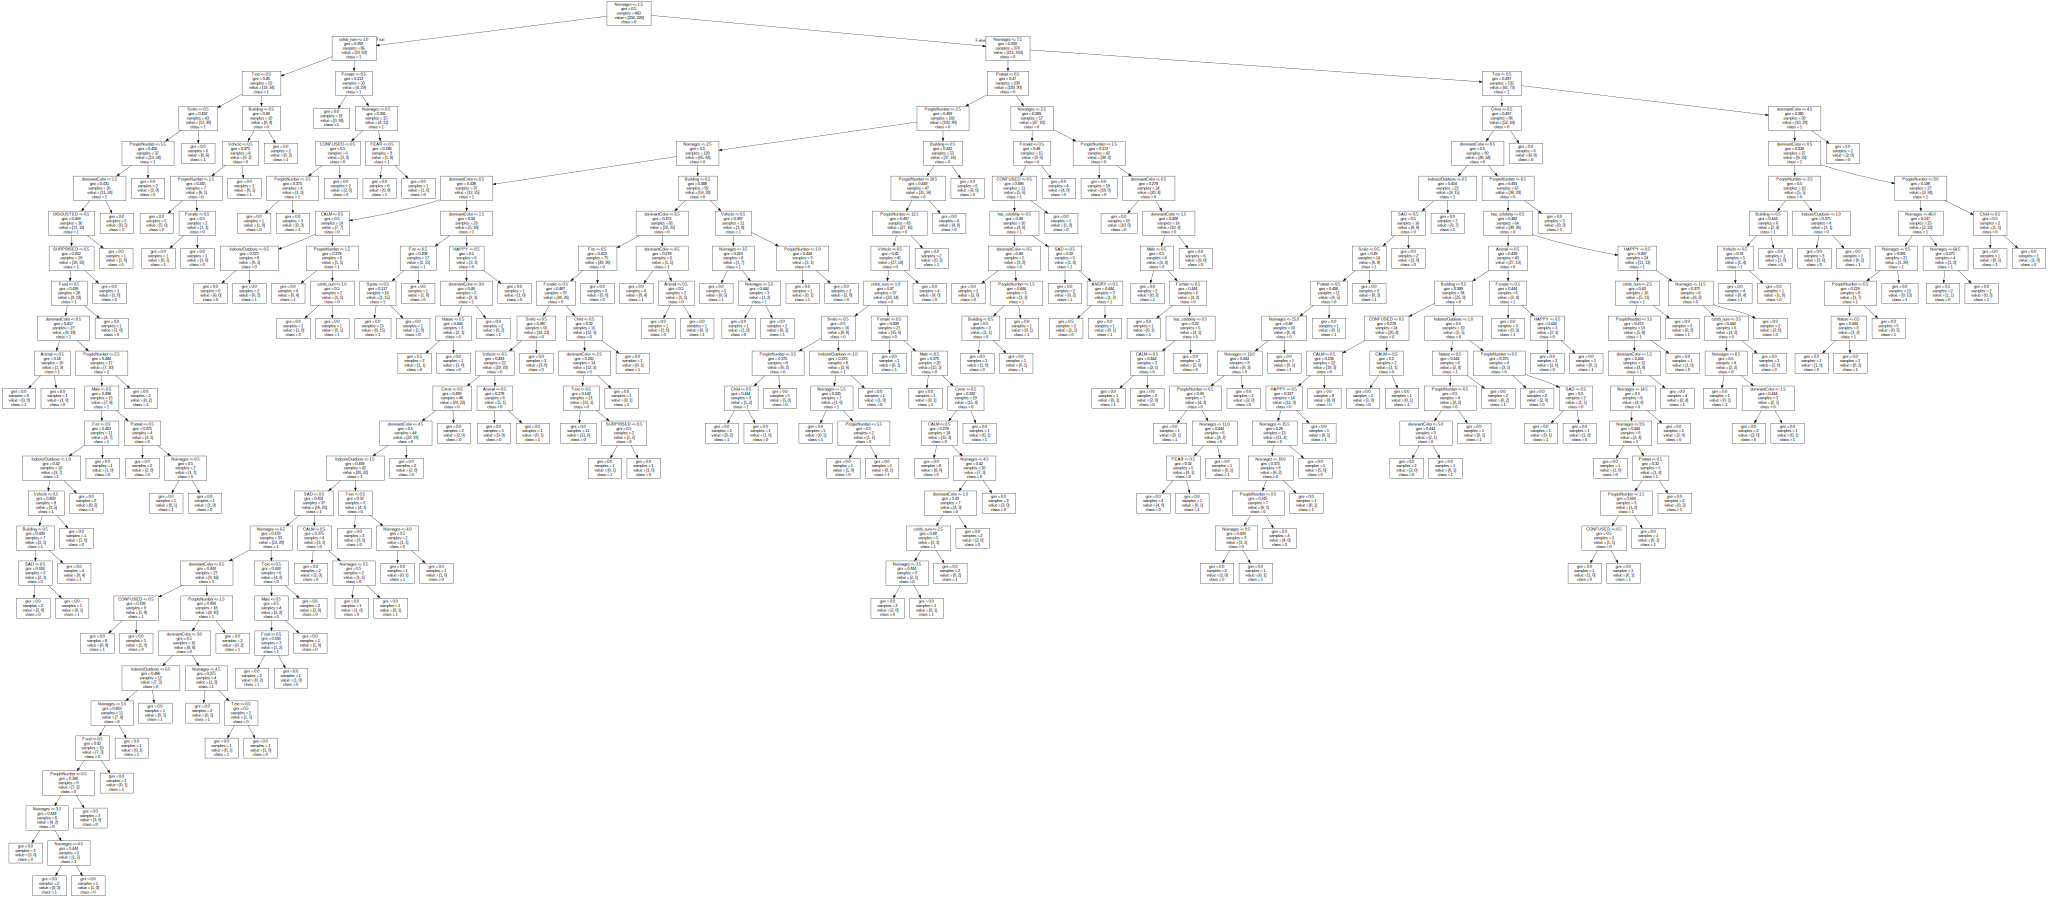

In [179]:
#visualise the tree 
#!apt-get install graphviz
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source
from sklearn import tree
graph = Source(tree.export_graphviz(dt, out_file=None,feature_names=predictors.columns, class_names=["0", "1"]))
png_bytes = graph.pipe(format='png')
with open('tree_pipe.png','wb') as f:
    f.write(png_bytes)

graph

In [180]:
fi = pd.DataFrame(dt.feature_importances_, X_train.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
Noimages,0.202440
dominantColor,0.127819
PeopleNumber,0.108209
Indoors/Outdoors,0.050396
Building,0.046234
Text,0.039942
Female,0.037468
Portrait,0.032949
Vehicle,0.031389
celeb_num,0.028989


### Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(4):
    rf = RandomForestClassifier(random_state=x, min_samples_split=3, n_estimators=9000,max_features=0.9)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [182]:
Y_pred_rf.shape

(115,)

In [183]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using RF is: "+str(score_rf)+" %")

The accuracy score achieved using RF is: 58.26 %


In [184]:
print('Classification Report\n', classification_report(Y_test, Y_pred_rf))

Classification Report
               precision    recall  f1-score   support

           0       0.53      0.55      0.54        51
           1       0.63      0.61      0.62        64

    accuracy                           0.58       115
   macro avg       0.58      0.58      0.58       115
weighted avg       0.58      0.58      0.58       115



In [185]:
fi = pd.DataFrame(rf.feature_importances_, X_train.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
Noimages,0.261337
dominantColor,0.109700
PeopleNumber,0.086583
celeb_num,0.041288
Text,0.039278
Portrait,0.036151
Indoors/Outdoors,0.035020
CALM,0.032366
Building,0.030526
Female,0.030478


### XGBoost

In [186]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [187]:
Y_pred_xgb.shape

(115,)

In [188]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 60.0 %


In [189]:
print('Classification Report\n', classification_report(Y_test, Y_pred_xgb))

Classification Report
               precision    recall  f1-score   support

           0       0.55      0.57      0.56        51
           1       0.65      0.62      0.63        64

    accuracy                           0.60       115
   macro avg       0.60      0.60      0.60       115
weighted avg       0.60      0.60      0.60       115

